Methods

- NB variants
- KNN
- Linear SVC

Metrics
- computation time
- wt. avg accuracy and stddev

In [1]:
from sklearn.naive_bayes import GaussianNB, CategoricalNB, MultinomialNB, BernoulliNB, ComplementNB
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

In [2]:
import seaborn as sns
import numpy as np
import random

In [3]:
from tqdm import tqdm_notebook

In [4]:
import pandas as pd

In [5]:
from glob import glob
from time import process_time



In [6]:
files = glob("andrew_train_data/tracker_list*.csv")
random.shuffle(files)
len(files)

45660

In [7]:
models = GaussianNB, BernoulliNB, KNeighborsClassifier, SVC

In [8]:
str(type(GaussianNB()).__name__)

'GaussianNB'

In [9]:
from collections import defaultdict

results = defaultdict(list)

In [10]:
for f in tqdm_notebook(files[:10000]):
#     print(f)
    df = pd.read_csv(f)
    df.columns = df.columns.str.replace(' ', '')
    X_train, X_test, y_train, y_test = train_test_split(df[["x", "y", "heading"]], df["id"], test_size=0.7, random_state=0)
    trained_estimators = []
    for model in models:
        estimator = model()
        
        
        t = process_time()
        trained_estimator = estimator.fit(X_train, y_train)
        elapsed_time = process_time() - t
        
        trained_estimators.append(trained_estimator)

        
        modelname = type(estimator).__name__
        results[modelname + "_time"].append(elapsed_time)
        
        y_pred = trained_estimator.predict(X_test)
        accuracy = (y_pred == y_test).sum() / len(y_pred)
        
        results[modelname + "_accuracy"].append(accuracy)
        
#         print(modelname, "got", accuracy, "accuracy in", elapsed_time, "seconds")

/tmp/ipykernel_23419/3325978302.py:1: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for f in tqdm_notebook(files[:10000]):


  0%|          | 0/10000 [00:00<?, ?it/s]

In [11]:
time_dict = {}
accuracy_dict = {}

In [12]:
for key, value in results.items():
    if "time" in key:
        time_dict[key] = value
    elif "accuracy" in key:
        accuracy_dict[key] = value
    print(key, "mean:", np.array(value).mean(), "stddev:", np.array(value).std())

GaussianNB_time mean: 0.001064441658900146 stddev: 0.00012260626796903976
GaussianNB_accuracy mean: 0.9504787898715041 stddev: 0.047159787455818045
BernoulliNB_time mean: 0.0009647307390000445 stddev: 7.356112578956284e-05
BernoulliNB_accuracy mean: 0.4922323371126228 stddev: 0.12410494992436058
KNeighborsClassifier_time mean: 0.0007545118884000974 stddev: 4.791208818173762e-05
KNeighborsClassifier_accuracy mean: 0.975459806500378 stddev: 0.021475716606758868
SVC_time mean: 0.0024592582679001207 stddev: 0.000825607263518835
SVC_accuracy mean: 0.9304701761148905 stddev: 0.05569346727877139


In [13]:
time_df = pd.DataFrame.from_dict(time_dict)

In [14]:
accuracy_df = pd.DataFrame.from_dict(accuracy_dict)

In [15]:
time_df

,GaussianNB_time,BernoulliNB_time,KNeighborsClassifier_time,SVC_time
0,0.000945,0.003942,0.000804,0.001134
1,0.001089,0.000998,0.000778,0.001916
2,0.001127,0.001011,0.000787,0.003152
3,0.001168,0.001022,0.000799,0.002635
4,0.001126,0.001009,0.000788,0.003800
...,...,...,...,...
9995,0.000908,0.000913,0.000712,0.001279
9996,0.001081,0.000962,0.000754,0.003960
9997,0.000964,0.000943,0.000744,0.001488
9998,0.001062,0.000957,0.000749,0.002642


<AxesSubplot:ylabel='Count'>

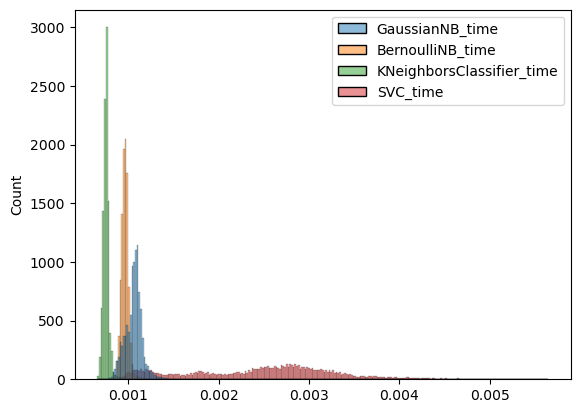

In [16]:
sns.histplot(time_df, alpha=0.5)

<AxesSubplot:ylabel='Count'>

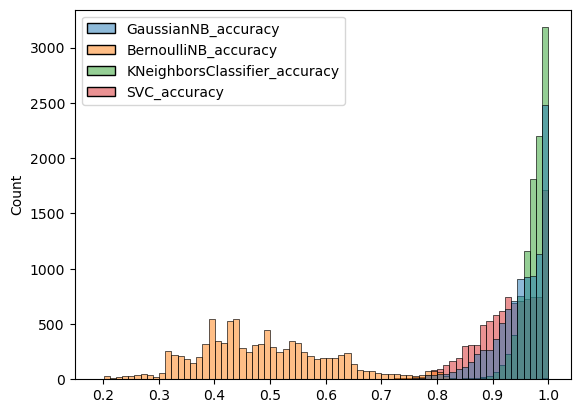

In [17]:
sns.histplot(accuracy_df)

In [18]:
df

,id,x,y,heading,speed,ang_v
0,6,-440.140,5643.90,2.062990,6.280940,0
1,6,4985.080,3552.75,0.323157,6.280940,0
2,6,4980.110,3098.09,0.191721,6.280940,0
3,6,-468.283,5643.14,2.100400,6.280940,0
4,6,1784.570,6123.26,1.433390,6.280940,0
...,...,...,...,...,...,...
1345,7,-415.772,2347.21,-3.001700,0.593419,0
1346,7,-367.725,2405.51,-3.162340,0.593419,0
1347,7,-405.995,2198.38,-2.744840,0.593419,0
1348,7,-387.483,2423.47,-2.878690,0.593419,0


<AxesSubplot:xlabel='x', ylabel='y'>

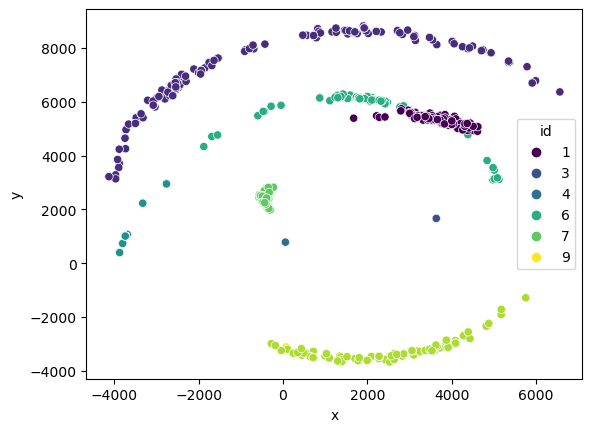

In [19]:
sns.scatterplot(data=df, x="x", y="y", hue="id", palette="viridis")

In [20]:
import matplotlib.pyplot as plt

In [25]:
df = pd.read_csv(files[10])
df.columns = df.columns.str.replace(' ', '')
X_train, X_test, y_train, y_test = train_test_split(df[["x", "y", "heading"]], df["id"], test_size=0.7, random_state=0)
trained_estimators = []
for model in models:
    estimator = model()
    trained_estimator = estimator.fit(X_train, y_train)

    trained_estimators.append(trained_estimator)

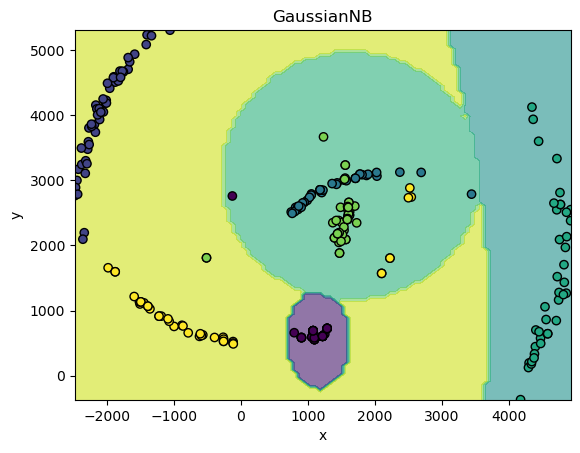

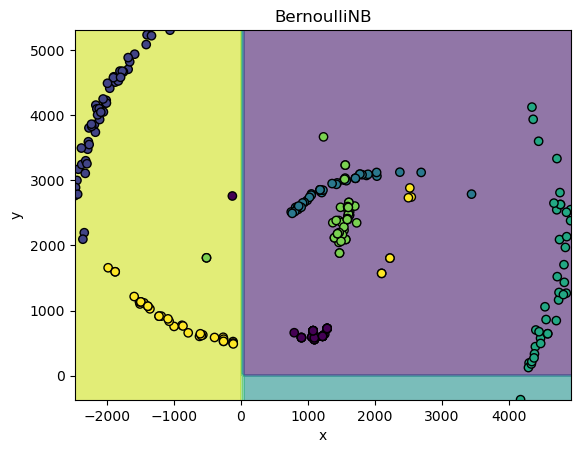

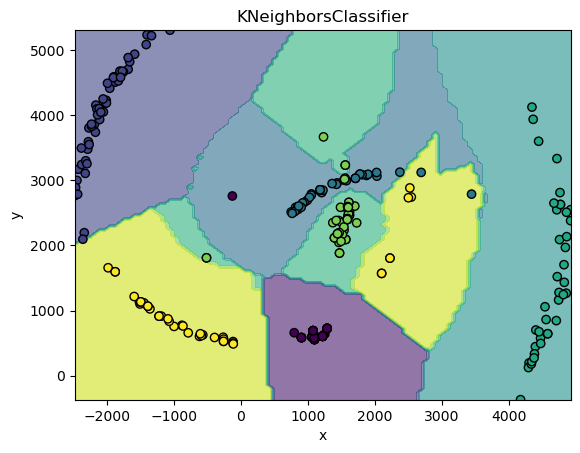

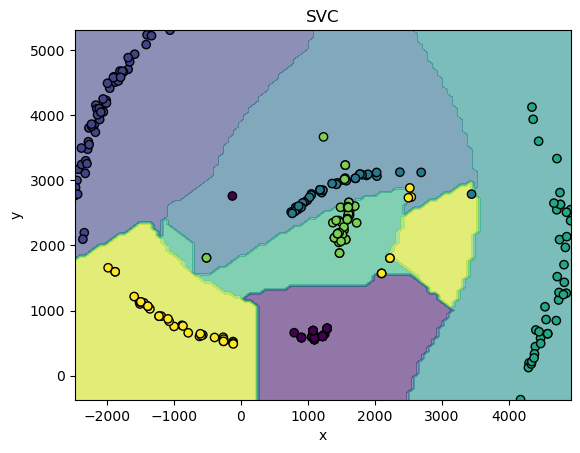

In [26]:
from my_decision_boundary_display import DecisionBoundaryDisplay

X = X_train
y = y_train

for idx, estimator in enumerate(trained_estimators):
    name =str(type(models[idx]()).__name__) 
    disp = DecisionBoundaryDisplay.from_estimator(
        trained_estimators[idx], X, response_method="auto",
        alpha=0.6
    )
    disp.ax_.scatter(X["x"], X["y"], c=y, edgecolor="k")
    plt.title(name)
    plt.show()